# CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the good will of the brand of the car, features of the car, horoscope and
the milage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want
to learn how to train a car price prediction model then this project is for you.

In [31]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  #seaborn
import matplotlib.pyplot as plt     #matplotlib
import warnings     # ignore warnings
warnings.filterwarnings("ignore")
import os

In [32]:
# Setting up the graph, plots font 
plt.rc('font', **{'size':16, 'family':'constantia'})

In [33]:
#Loading dataset
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [34]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [36]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [37]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [38]:
df.shape

(301, 9)

In [39]:
df.size

2709

In [40]:
# Checking for null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Analysing the dataset

Getting data form the dataset

In [41]:
cr_name = df.Car_Name.unique()
print("Cars in the dataset are:- ", cr_name)

Cars in the dataset are:-  ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Aveng

In [42]:
print("Values in the column of type of fuel \n",df.Fuel_Type.value_counts(),"\n")
print("Values in the column of type of sellers \n",df.Selling_type.value_counts(),"\n")
print("Values in the column of Transmission values \n",df.Transmission.value_counts())

Values in the column of type of fuel 
 Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64 

Values in the column of type of sellers 
 Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64 

Values in the column of Transmission values 
 Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [43]:
#Fuel_Type ==> 1 = Petrol , 0 = Diesel , 2 = CNG
#Selling_type ==> 1 = Manual , 0 = Automatic 
#Selling_type ==> 1 = Dealer , 0 = Individual

print(df.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True))
print(df.Selling_type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True))
print(df.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True))

None
None
None


In [44]:
# Generating dictionary of Car-brands and their models names 
Car_companies = {}
for cars in cr_name:
    car = cars.split()
    if car[0] in Car_companies:
        Car_companies[car[0]][0]+= 1
        Car_companies[car[0]].append(cars)
    else:
        Car_companies[car[0]] = [1, cars]


# Getting Car-brands names list 
Company_Names = list(Car_companies.keys())

# No of Model Car-brands have 
No_of_models = []
for no_of_model in Car_companies.values():
    No_of_models.append(no_of_model[0])


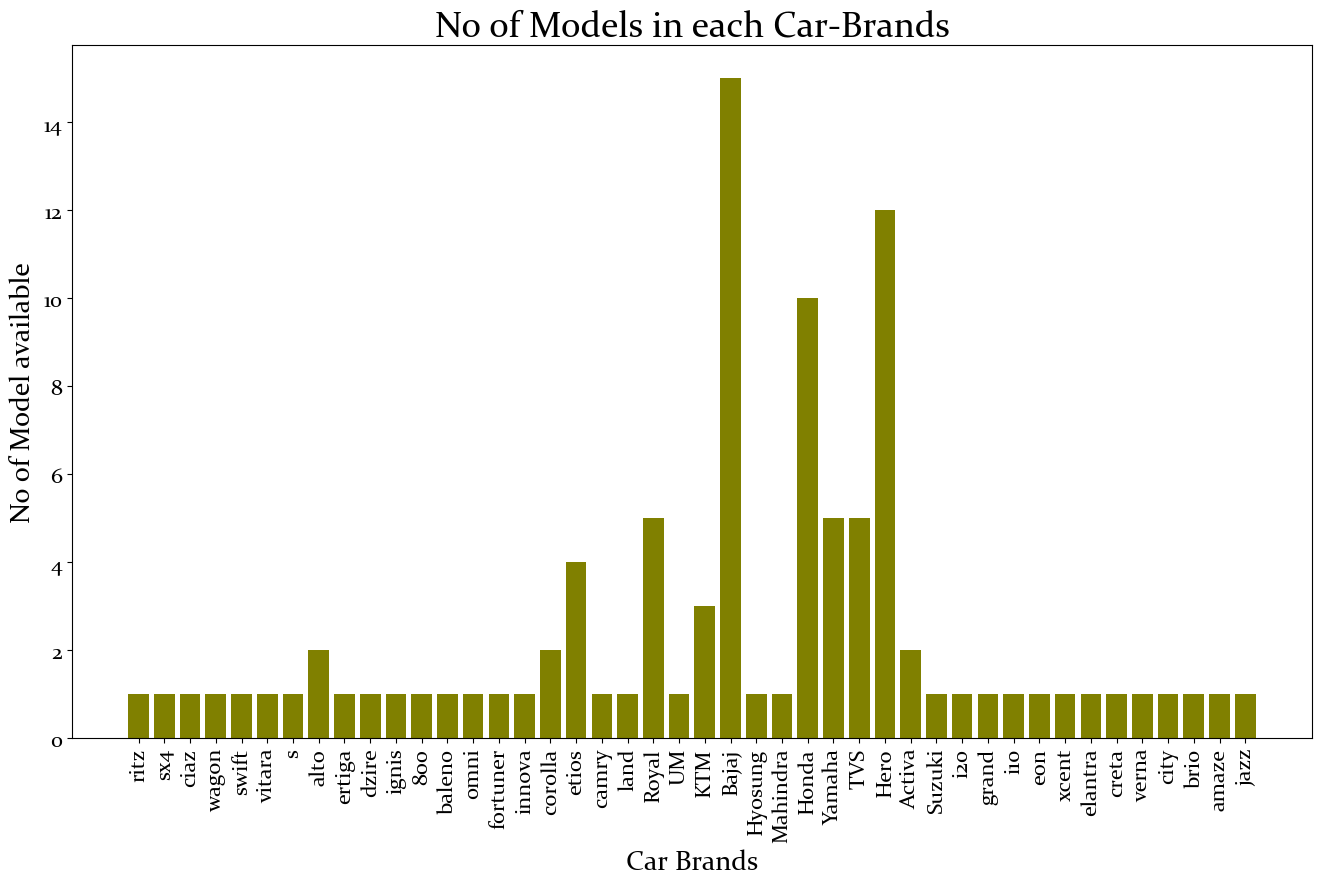

In [45]:
plt.figure(figsize=(16,9))
plt.bar(Company_Names, No_of_models, color='olive')
plt.xticks(rotation=90)
plt.xlabel("Car Brands", font={'size':20})
plt.ylabel("No of Model available", font={'size':20})
plt.title("No of Models in each Car-Brands", font={'size':26})
plt.show()

In [46]:
# Getting the Price value of each models saled by Car-brand
model_prices = {}
for company in Car_companies:
    if company not in model_prices:
        model_prices[company] = np.array(0)
    for car in Car_companies[company][1:]:
        c = df.loc[df["Car_Name"] == car]
        model_prices[company] = np.append(model_prices[company], c['Selling_Price'].values[0])
    model_prices[company] = model_prices[company][1:]

In [47]:
# Getting the Mean-Price value of models saled by each Car-brand
mean_price = {}
for company in Car_companies:
    company_mean_price = int(model_prices[company].mean())
    mean_price[company] = company_mean_price

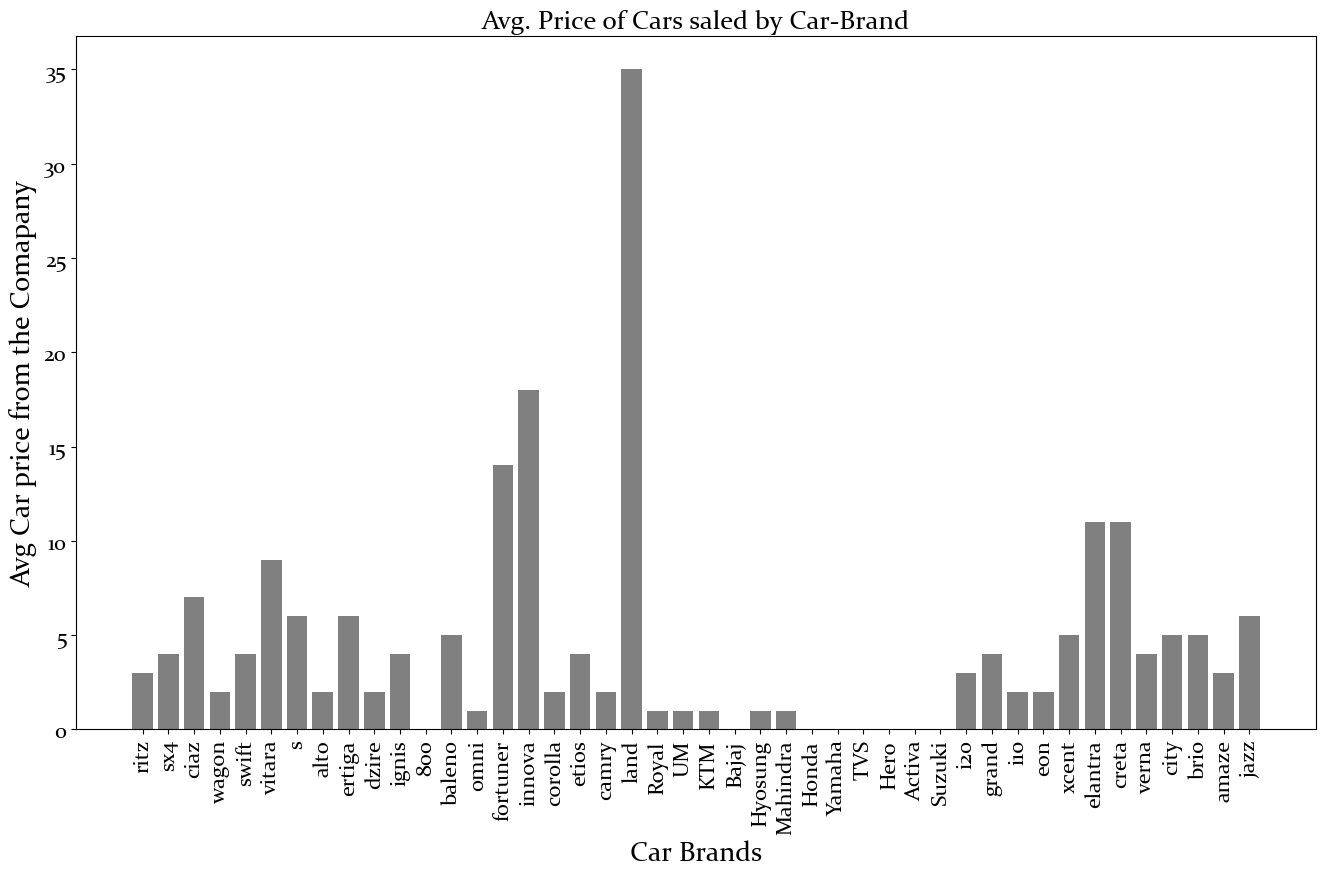

In [48]:
plt.figure(figsize=(16,9))
plt.bar(Company_Names, list(mean_price.values()), color='grey')
plt.xticks(rotation=90)
plt.xlabel("Car Brands", font={'size':20})
plt.ylabel("Avg Car price from the Comapany", font={'size':20})
plt.title("Avg. Price of Cars saled by Car-Brand")
plt.show()

## Generating the Co-relation Matrix of dataset
#### then removing columns with low-relation value with price

In [49]:

import pandas as pd
import numpy as np


df['Car_Name'] = pd.to_numeric(df['Car_Name'], errors='coerce')


# Compute correlation matrix
correlation_matrix = df.corr()

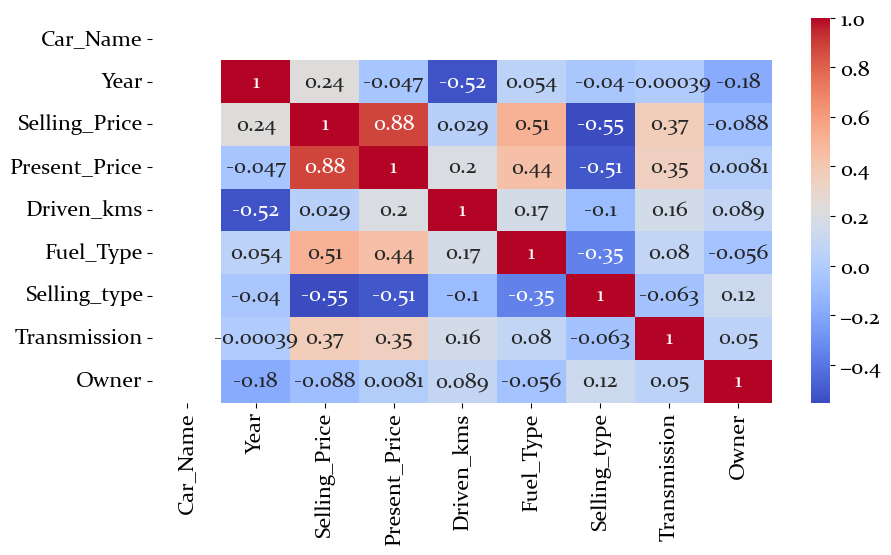

In [50]:
plt.figure(figsize=(10, 5))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

<Axes: >

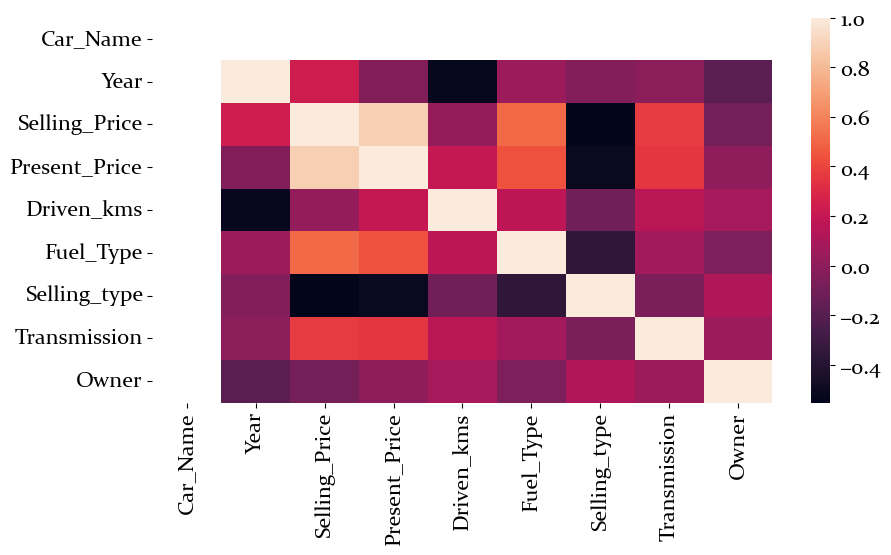

In [51]:
#Heat map
fig, ax = plt.subplots(figsize=(10,5))   
sns.heatmap(df.corr())

# Pairplot

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in 
data will by shared in the y-axis across a single row and in the x-axis across a single column. 

<Figure size 900x900 with 0 Axes>

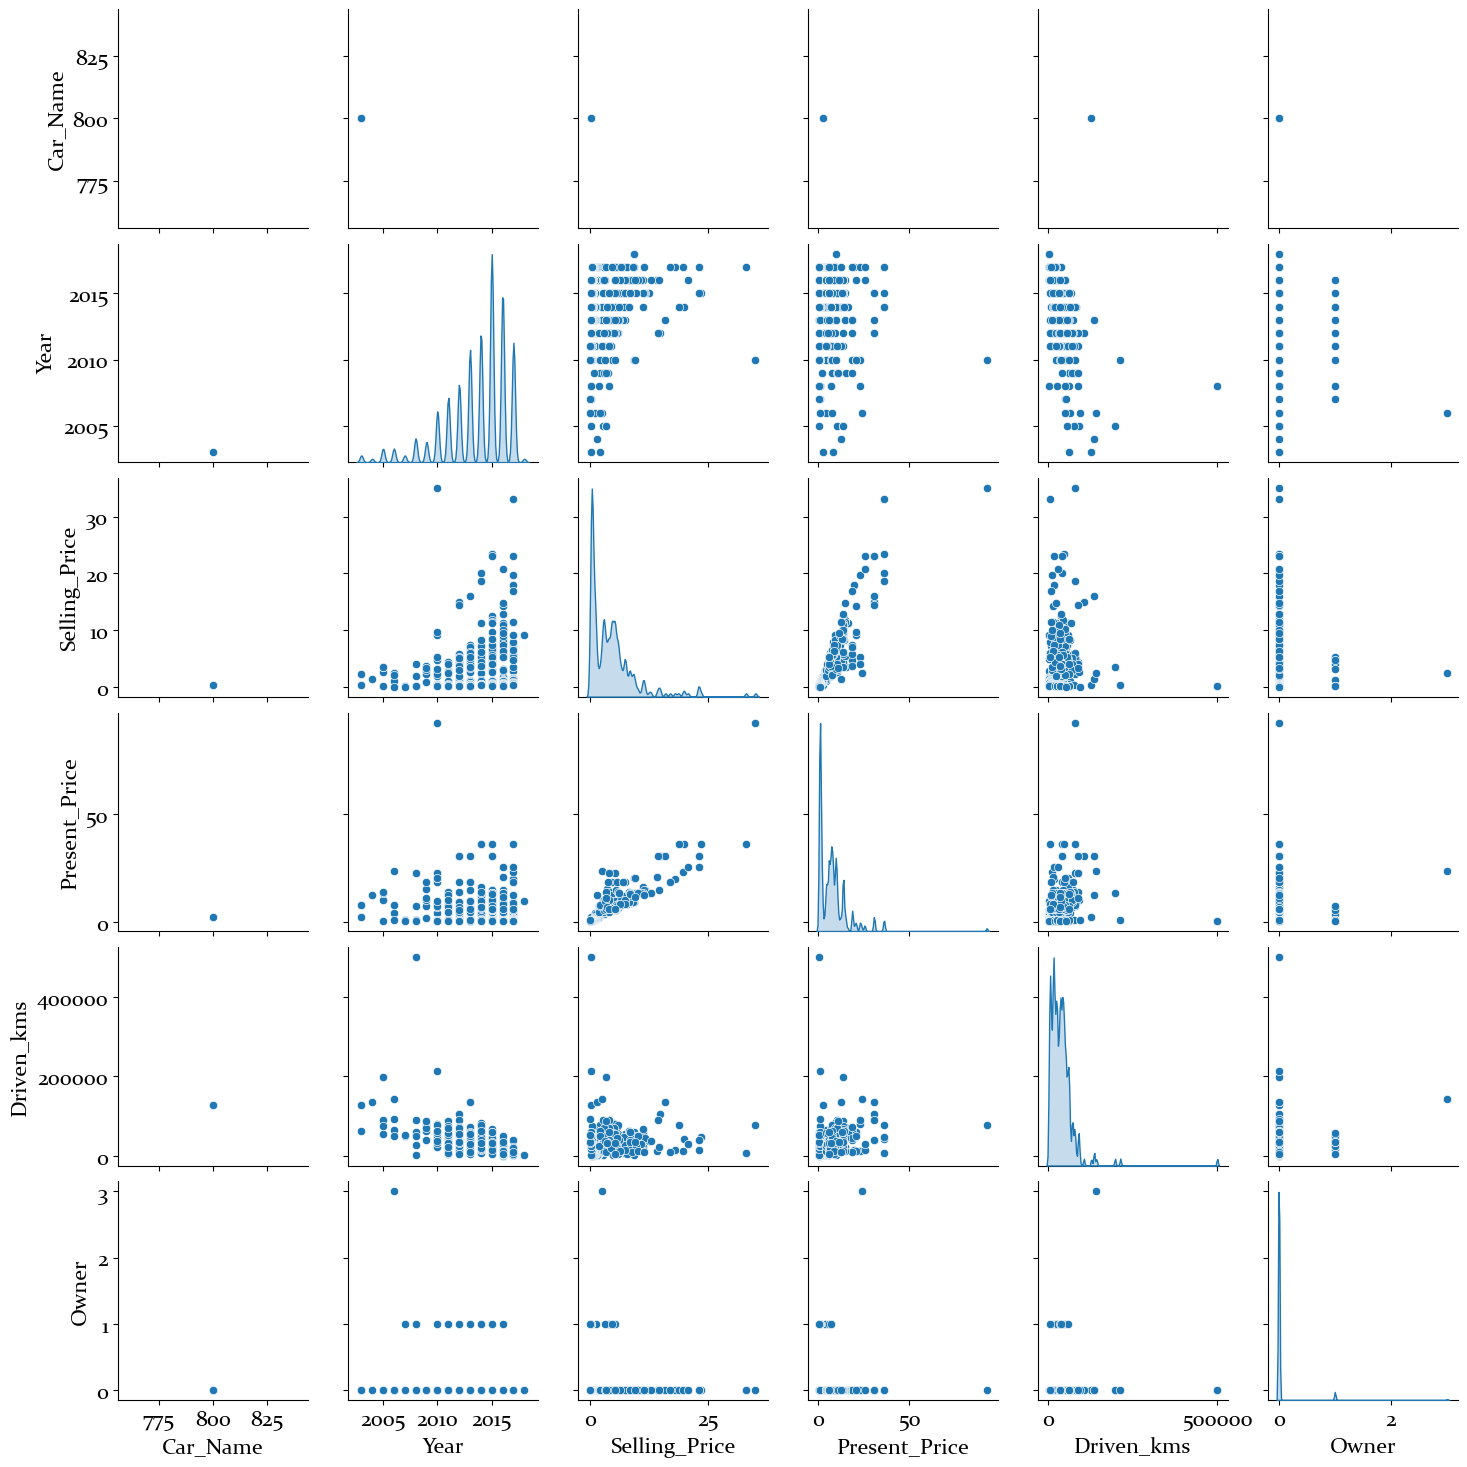

In [52]:
plt.figure(figsize=(9,9))
sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

In [53]:
y=df.Selling_Price
x=df.drop(["Selling_Price","Car_Name"],axis=1)
print("Dataset after removing columns : \n",x)

Dataset after removing columns : 
      Year  Present_Price  Driven_kms Fuel_Type Selling_type Transmission  \
0    2014           5.59       27000         0            0            0   
1    2013           9.54       43000         1            0            0   
2    2017           9.85        6900         0            0            0   
3    2011           4.15        5200         0            0            0   
4    2014           6.87       42450         1            0            0   
..    ...            ...         ...       ...          ...          ...   
296  2016          11.60       33988         1            0            0   
297  2015           5.90       60000         0            0            0   
298  2009          11.00       87934         0            0            0   
299  2017          12.50        9000         1            0            0   
300  2016           5.90        5464         0            0            0   

     Owner  
0        0  
1        0  
2        0  


# Applying Regression Models

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("Dimensions of x train: ",x_train.shape)
print("Dimensions of x test: ",x_test.shape)
print("Dimensions of y train: ",y_train.shape)
print("Dimensions of y test: ",y_test.shape)

Dimensions of x train:  (240, 7)
Dimensions of x test:  (61, 7)
Dimensions of y train:  (240,)
Dimensions of y test:  (61,)


In [56]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [57]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(10,5),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(10,5),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression() 

r_2 score : 0.8476231240064116 

CV scores: [0.89742884 0.88694518 0.83010852 0.81465876 0.75781611] 

CV scores mean: 0.8373914789815009


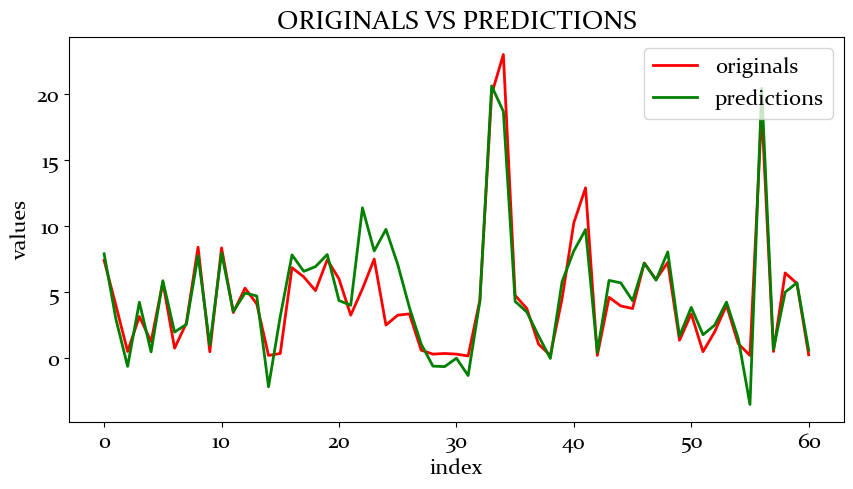

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)